In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
model_base = "CNN_hd32_nl6_id2_r0.2_nllloss_bs128_ep100_lr0.001_ndata8000"
#model_base = "CNN_hd32_nl6_id2_r0.2_bce_bs128_ep100_lr0.001_ndata8000"

output_dir = f"./output/{model_base}"
norm_param = np.loadtxt("./param/norm_params.txt")[1:]

nout = 2

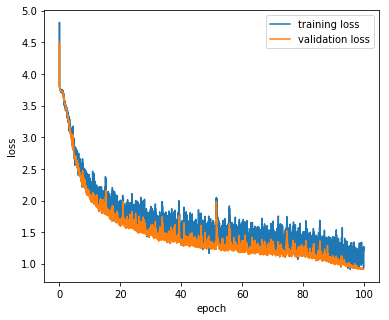

In [19]:
# loss function
fname = f"{output_dir}/log.txt"
data = np.loadtxt(fname)

plt.figure(figsize=(6,5))
plt.ylabel("loss")

plt.xlabel("epoch")
plt.plot(data[:,1], data[:,2], label="training loss")
plt.plot(data[:,1], data[:,3], label="validation loss")


plt.legend(loc="upper right")
plt.savefig("figures/loss.png") 

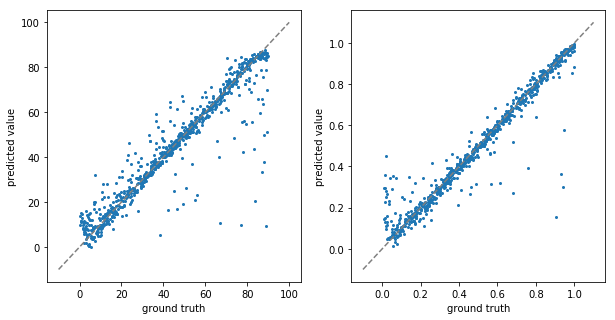

In [15]:
# check validation result
fname = f"{output_dir}/val.txt"
data = np.loadtxt(fname)

fig, axs = plt.subplots(1,nout,figsize=(5*nout,5))
for i in range(nout):
    ax = axs if nout == 1 else axs[i]
    
    ax.scatter(data[:,2*i], data[:,2*i+1], s=4)

    ax.set_xlabel("ground truth")
    ax.set_ylabel("predicted value")

    xx = np.linspace(norm_param[i,0],norm_param[i,1],10)
    ax.plot(xx,xx,ls="--",color="gray")
    
plt.savefig("figures/val.png")

Text(0, 0.5, 'a1ovGamma')

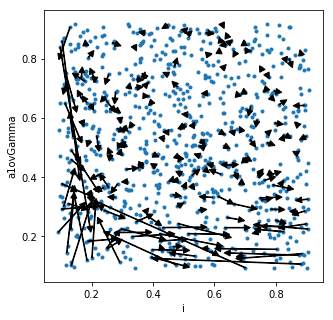

In [16]:
# check validation result
fname = f"{output_dir}/val.txt"
data = np.loadtxt(fname)

fig, ax = plt.subplots(1,1,figsize=(5,5))

for i in range(nout):
    data[:,2*i] = (data[:,2*i] - norm_param[i,0]) / (norm_param[i,1] - norm_param[i,0])
    data[:,2*i+1] = (data[:,2*i+1] - norm_param[i,0]) / (norm_param[i,1] - norm_param[i,0])

ax.scatter(data[:,0], data[:,2], marker=".")

for i in range(200): # len(data)):
    #if data[i,0] > 0.2: continue
    #if data[i,2] > 0.2: continue
    if data[i,0] - data[i,1] == 0 and data[i,3] - data[i,2] == 0:
        ax.scatter(data[i,0], data[i,2], color="k")
    else:
        ax.arrow(data[i,0], data[i,2], data[i,1]-data[i,0], data[i,3]-data[i,2], width=0.002,head_width=0.02,head_length=0.02,length_includes_head=True, color="k")

ax.set_xlabel("i")
ax.set_ylabel("a1ovGamma")

Text(0, 0.5, 'a1ovGamma')

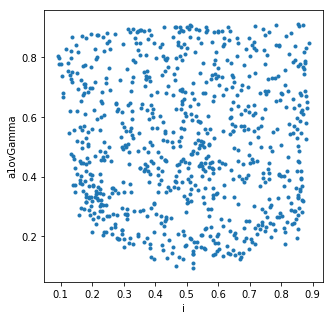

In [17]:
# check validation result
fname = f"{output_dir}/val.txt"
data = np.loadtxt(fname)

fig, ax = plt.subplots(1,1,figsize=(5,5))
for i in range(nout):
    data[:,2*i] = (data[:,2*i] - norm_param[i,0]) / (norm_param[i,1] - norm_param[i,0])
    data[:,2*i+1] = (data[:,2*i+1] - norm_param[i,0]) / (norm_param[i,1] - norm_param[i,0])
ax.scatter(data[:,1], data[:,3], marker=".")

ax.set_xlabel("i")
ax.set_ylabel("a1ovGamma")

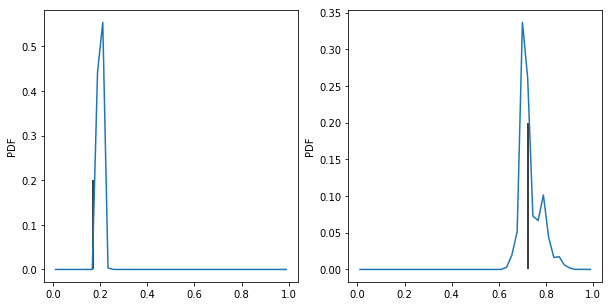

In [20]:
# check pdf distribution
# good examples: idata = 21

idata = 21
fname = f"{output_dir}/val_dist{idata}.txt"
data = np.loadtxt(fname)
fig, axs = plt.subplots(1,2, figsize=(10,5))

for i in range(nout):
    ax = axs[i]
    fname = f"{output_dir}/val.txt"
    true = np.loadtxt(fname)[idata,nout*i]
    true = (true - norm_param[i,0]) / (norm_param[i,1] - norm_param[i,0])
    
    ax.plot(data[:,0],np.exp(data[:,i+1]))
    ax.vlines(true, ymin=0, ymax=0.2)

    ax.set_ylabel("PDF")

800


Text(0.5, 0, 'sin (i)')

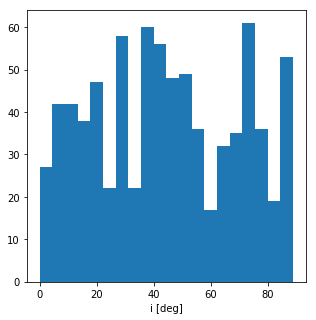

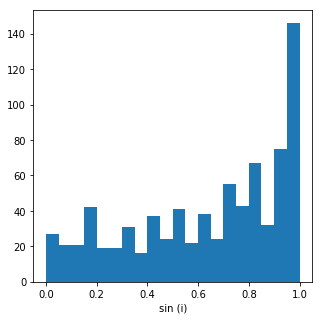

In [67]:
# check validation data distribution
nbins = 20

fname = f"{output_dir}/val.txt"
data = np.loadtxt(fname)
print(len(data))
counts, bins = np.histogram(data[:,0], bins=nbins)
fig = plt.figure(figsize=(5,5))
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel("i [deg]")

data2 = np.sin( np.deg2rad( data[:,0] ))
counts, bins = np.histogram(data2, bins=nbins)
fig = plt.figure(figsize=(5,5))
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel("sin (i)")

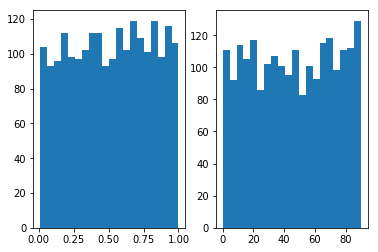

In [40]:
# check training data distribution
nbins = 20

fname = f"./training_data_2/Combinations.txt"
_data = np.loadtxt(fname, skiprows=5, usecols=[5,13])

fig, axs = plt.subplots(1,2)
for i in range(2):
    data = _data[:,i]
    ax = axs[i]
    
    counts, bins = np.histogram(data, bins=nbins)
    ax.hist(bins[:-1], bins, weights=counts)